In [32]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as un
from class_bomba import bomba, Q2v, incert_A, error

rho, g = 997, 9.8067

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='instr')

#Info medidas -> var pressão etc ...
df_v1 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v1')
df_v2 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v2')
df_v12 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v12')
df_v1sozinha = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v1_sozinha')

#Incerteza do tipo A
ze1 = incert_A(df_inst.ze1.values) / 100  #m
zs1 = incert_A(df_inst.zs1.values) / 100
ze2 = incert_A(df_inst.ze2.values) / 100  #m
zs2 = incert_A(df_inst.zs2.values) / 100
De = incert_A(df_inst.De.values) / 1000
Ds = incert_A(df_inst.Ds.values) / 1000
Drot = incert_A(df_inst.Drot.values) / 100

#Incerteza do tipo B - bomba 1
v1_pe = un.uarray(-df_v1.pe.values, (df_v1.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v1_ps = un.uarray(df_v1.ps.values, (df_v1.ps.values*0.05)/np.sqrt(3)) * 1e3 #Pa
v1_Q = un.uarray(df_v1.Q.values, (df_v1.Q.values*0.02)/np.sqrt(3)) #m^3/h
v1_w = un.uarray(df_v1.w.values, (df_v1.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - bomba 2
v2_pe = un.uarray(df_v2.pe.values, (df_v2.pe.values*0.05)/np.sqrt(3)) * 1e3 #Pa CUIDADO PORRA
v2_ps = un.uarray(df_v2.ps.values, (df_v2.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v2_Q = un.uarray(df_v2.Q.values, (df_v2.Q.values*0.02)/np.sqrt(3)) #m^3/h
v2_w = un.uarray(df_v2.w.values, (df_v2.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - bomba 1 + 2 série
v12_pe = un.uarray(df_v12.pe.values, (df_v12.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
v12_ps = un.uarray(df_v12.ps.values, (df_v12.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v12_Q = un.uarray(df_v12.Q.values, (df_v12.Q.values*0.02)/np.sqrt(3)) #m^3/h
v12_w = un.uarray(df_v12.w.values, (df_v12.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - bomba 1 sozinha
vs_pe = un.uarray(-df_v1sozinha.pe.values, (df_v1sozinha.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
vs_ps = un.uarray(df_v1sozinha.ps.values, (df_v1sozinha.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
vs_Q = un.uarray(df_v1sozinha.Q.values, (df_v1sozinha.Q.values*0.02)/np.sqrt(3)) #m^3/h
vs_w = un.uarray(df_v1sozinha.w.values, (df_v1sozinha.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - bomba 1 + 2 paralelo

b1  = bomba(v1_pe, v1_ps, Q2v(v1_Q, De), Q2v(v1_Q, Ds), ze1, zs1)
b2  = bomba(v2_pe, v2_ps, Q2v(v2_Q, Ds), Q2v(v2_Q, Ds), ze2, zs2)
b12  = bomba(v12_pe, v12_ps, Q2v(v12_Q, De), Q2v(v12_Q, Ds), ze1, zs2)
b1soz  = bomba(vs_pe, vs_ps, Q2v(vs_Q, De), Q2v(vs_Q, Ds), ze1, zs1)

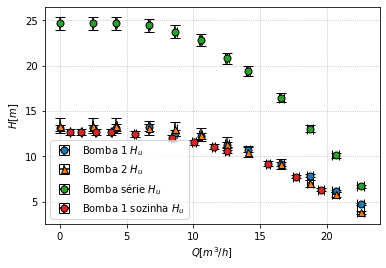

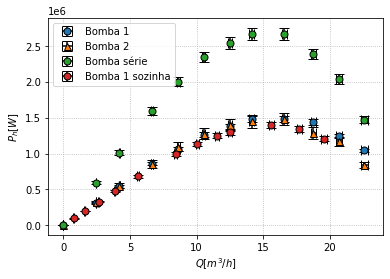

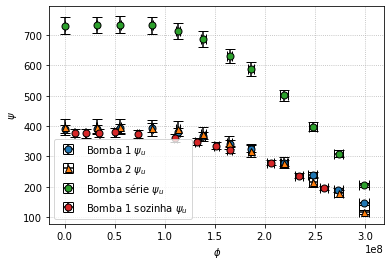

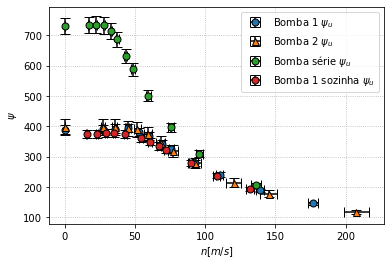

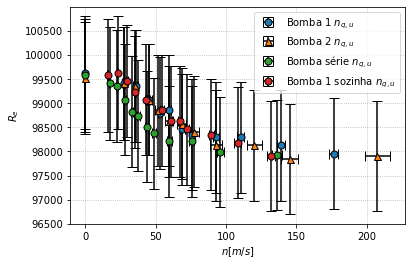

In [33]:
# Figura 1 ------------
fig, ax = plt.subplots()
ax.set(ylabel=r'$H [m]$', xlabel=r'$Q [m^3/h]$')

error(v1_Q, b1.hu, 'o', r'Bomba 1 $H_u$', ax)
error(v2_Q, b2.hu, '^', r'Bomba 2 $H_u$', ax)
error(v12_Q, b12.hu, 'o', r'Bomba série $H_u$', ax)
error(vs_Q, b1soz.hu, 'o', r'Bomba 1 sozinha $H_u$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('H_x_Q.pdf', bbox_inches='tight')

# Figura 2 ----------------
fig, ax = plt.subplots()
ax.set(ylabel=r'$P_h[W]$', xlabel=r'$Q[m^3/h]$')

error(v1_Q, b1.ph(v1_Q), 'o', 'Bomba 1', ax)
error(v2_Q, b2.ph(v2_Q), '^', 'Bomba 2', ax)
error(v12_Q, b12.ph(v12_Q), 'o', 'Bomba série', ax)
error(vs_Q, b1soz.ph(vs_Q), 'o', 'Bomba 1 sozinha', ax)
       
ax.legend()
ax.grid(ls='dotted')
fig.savefig('P_x_Q.pdf', bbox_inches='tight')


# Figura 3 ----------------
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$\phi$')

error(b1.phi(v1_Q, v1_w, De), b1.psi_u(v1_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)
error(b2.phi(v2_Q, v2_w, De), b2.psi_u(v2_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)
error(b12.phi(v12_Q, v12_w, De), b12.psi_u(v12_w, De), 'o', r'Bomba série $\psi_{u}$', ax)
error(b1soz.phi(vs_Q, vs_w, De), b1soz.psi_u(vs_w, De), 'o', r'Bomba 1 sozinha $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_phi.pdf', bbox_inches='tight')


# Figura 4 -----------------
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$n [m/s]$')

error(b1.nq_u(v1_Q, v1_w), b1.psi_u(v1_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)
error(b2.nq_u(v2_Q, v2_w), b2.psi_u(v2_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)
error(b12.nq_u(v12_Q, v12_w), b12.psi_u(v12_w, De), 'o', r'Bomba série $\psi_{u}$', ax)
error(b1soz.nq_u(vs_Q, vs_w), b1soz.psi_u(vs_w, De), 'o', r'Bomba 1 sozinha $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_n.pdf', bbox_inches='tight')

# Figura 5 ------------------
viscosidade = 0.893e-6
fig, ax = plt.subplots()
ax.set(ylabel=r'$R_e$', xlabel=r'$n[m/s]$')

error(b1.nq_u(v1_Q, v1_w), b1.Re(v1_w, De, viscosidade), 'o', r'Bomba 1 $n_{q,u}$', ax)
error(b2.nq_u(v2_Q, v2_w), b2.Re(v2_w, De, viscosidade), '^', r'Bomba 2 $n_{q,u}$', ax)
error(b12.nq_u(v12_Q, v12_w), b12.Re(v12_w, De, viscosidade), 'o', r'Bomba série $n_{q,u}$', ax)
error(b1soz.nq_u(vs_Q, vs_w), b1soz.Re(vs_w, De, viscosidade), 'o', r'Bomba 1 sozinha $n_{q,u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Re_x_n.pdf', bbox_inches='tight')

In [34]:
viscosidade = 0.893e-6
vazão = pd.DataFrame({'b1':v1_Q, 'b2':v2_Q, 'b12s':v12_Q, 'b1sozinho':vs_Q}).to_latex(index=False)
#print(vazão)
hu = pd.DataFrame({'b1': b1.hu, 'b2':b2.hu, 'b12s':b12.hu, 'b1sozinho':b1soz.hu}).to_latex(index=False)
#print(hu)
Ph = pd.DataFrame({'b1': b1.ph(v1_Q), 'b2':b2.ph(v2_Q), 'b12s':b12.ph(v12_Q,), 'b1sozinho':b1soz.ph(vs_Q)}).to_latex(index=False)
#print(Ph)
phi = pd.DataFrame({'b1': b1.phi(v1_Q, v1_w, De), 'b2':b2.phi(v2_Q, v2_w, De), 'b12s':b12.phi(v12_Q, v12_w, De), 'b1sozinho':b1soz.phi(vs_Q, vs_w, De)}).to_latex(index=False)
#print(phi)

psi = pd.DataFrame({'b1': b1.psi_u(v1_w, De), 'b2':b2.psi_u(v2_w, De), 'b12s':b12.psi_u(v12_w, De), 'b1sozinho':b1soz.psi_u(vs_w, De)}).to_latex(index=False)
#print(psi)

n = pd.DataFrame({'b1': b1.nq_u(v1_Q, De), 'b2':b2.nq_u(v2_Q, De), 'b12s':b12.nq_u(v12_Q, De), 'b1sozinho':b1soz.nq_u(vs_Q, De)}).to_latex(index=False)
#print(n)
Re = pd.DataFrame({'b1': b1.Re(v1_Q, De, viscosidade), 'b2':b2.Re(v2_Q, De, viscosidade), 'b12s':b12.Re(v12_Q, De, viscosidade), 'b1sozinho':b1soz.Re(vs_Q, De, viscosidade)}).to_latex(index=False)
print(Re)

\begin{tabular}{llll}
\toprule
                 b1 &                  b2 &                b12s &           b1sozinho \\
\midrule
  (7.55+/-0.09)e+04 &   (7.55+/-0.09)e+04 &   (7.55+/-0.09)e+04 &   (6.54+/-0.08)e+04 \\
  (6.91+/-0.08)e+04 &   (6.91+/-0.08)e+04 &   (6.91+/-0.08)e+04 &   (5.93+/-0.07)e+04 \\
  (6.28+/-0.07)e+04 &   (6.28+/-0.07)e+04 &   (6.28+/-0.07)e+04 &   (5.22+/-0.06)e+04 \\
  (5.55+/-0.06)e+04 &   (5.55+/-0.06)e+04 &   (5.55+/-0.06)e+04 &   (4.19+/-0.05)e+04 \\
  (4.73+/-0.06)e+04 &   (4.73+/-0.06)e+04 &   (4.73+/-0.06)e+04 &   (3.86+/-0.05)e+04 \\
  (4.19+/-0.05)e+04 &   (4.19+/-0.05)e+04 &   (4.19+/-0.05)e+04 &   (3.36+/-0.04)e+04 \\
  (3.53+/-0.04)e+04 &   (3.53+/-0.04)e+04 &   (3.53+/-0.04)e+04 & (2.821+/-0.033)e+04 \\
(2.892+/-0.034)e+04 & (2.892+/-0.034)e+04 & (2.892+/-0.034)e+04 & (1.881+/-0.022)e+04 \\
(2.232+/-0.026)e+04 & (2.232+/-0.026)e+04 & (2.232+/-0.026)e+04 & (1.292+/-0.015)e+04 \\
(1.409+/-0.016)e+04 & (1.409+/-0.016)e+04 & (1.409+/-0.016)e+04 &   (8